## importing the data from the source

In [23]:
from ucimlrepo import fetch_ucirepo

# 1. Fetch the Adult dataset (ID=2)
adult = fetch_ucirepo(id=2)

# 2. Extract features and target
X = adult.data.features        # pandas DataFrame
y_raw = adult.data.targets         # could be a Series or 1-col DataFrame

# 3. Turn y_raw into a flat Series named “income”
import pandas as pd

if isinstance(y_raw, pd.DataFrame):
    y = y_raw.iloc[:, 0]           # grab the single column
else:
    y = pd.Series(y_raw)

y.name = 'income'

In [24]:
#concatenate X and y into a single DataFrame
df = pd.concat([X, y], axis=1)



In [25]:
#imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [27]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [28]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

#### we want to check if there are null values

In [29]:
print(f"Missing values per column :\n{df.isnull().sum()}")
print("----------------------")
# to get a better understanding of what percentage of the columns are missing
missing = df.isnull().sum() / len(df) * 100
print(f"Percentage of missing values per column :\n{missing}")

Missing values per column :
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
----------------------
Percentage of missing values per column :
age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
income            0.000000
dtype: float64


### Based on missing values percentiles, we think that we can infer meaningful data from the missing values.
By replacing the "null" values with the string "missing" we can hopefully learn from the dataset.
We think that the missing data is refering to unoccupied people, however we're not certain, as it was not mentioned on the dataset documentation.

The missing values in the 'native country' column will be dropped as they are very scarce and we believe they dont contribute to any relevant question.

In [30]:
df['workclass'] = df['workclass'].fillna('missing')
df['occupation'] = df['occupation'].fillna('missing')
#drop the rows with missing values in the 'native-country' column
df = df.dropna(subset=['native-country'])

In [31]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [32]:
#we want to see how many unique values are in each column 
unique_values = df.nunique()
print(f"Unique values per column :\n{unique_values}")

Unique values per column :
age                  74
workclass            10
fnlwgt            28424
education            16
education-num        16
marital-status        7
occupation           16
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64


#### the column "fnlwgt" looks odd - it has 28k unique value, we assume that it can be something like  the id of each person, but then it means that there are duplicated rows

In [33]:
#lets check the odd values in fnlwgt
df['fnlwgt'].describe()


count    4.856800e+04
mean     1.896385e+05
std      1.056425e+05
min      1.228500e+04
25%      1.175085e+05
50%      1.781570e+05
75%      2.375868e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

didnt get anything intresting


In [34]:
#lets see the values  in the 'workclass' column
df['workclass'].value_counts()





workclass
Private             33717
Self-emp-not-inc     3838
Local-gov            3126
State-gov            1965
?                    1836
Self-emp-inc         1688
Federal-gov          1423
missing               944
Without-pay            21
Never-worked           10
Name: count, dtype: int64

### we can see that theres a unknown value '?' --> we will add this value to 'missing' value.



In [35]:
#adding the '?' values to the missing values
df['workclass'] = df['workclass'].replace('?', 'missing')
df['workclass'].value_counts()

workclass
Private             33717
Self-emp-not-inc     3838
Local-gov            3126
missing              2780
State-gov            1965
Self-emp-inc         1688
Federal-gov          1423
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [36]:
#chcecking if the '?' phenomenon is present in the 'occupation' column
df['occupation'].value_counts()


occupation
Prof-specialty       6110
Craft-repair         6089
Exec-managerial      6058
Adm-clerical         5589
Sales                5474
Other-service        4891
Machine-op-inspct    3006
Transport-moving     2341
Handlers-cleaners    2066
?                    1843
Farming-fishing      1485
Tech-support         1436
Protective-serv       981
missing               947
Priv-house-serv       238
Armed-Forces           14
Name: count, dtype: int64

In [37]:
#adding the '?' values to the missing values
df['occupation'] = df['occupation'].replace('?', 'missing')
df['occupation'].value_counts()

occupation
Prof-specialty       6110
Craft-repair         6089
Exec-managerial      6058
Adm-clerical         5589
Sales                5474
Other-service        4891
Machine-op-inspct    3006
missing              2790
Transport-moving     2341
Handlers-cleaners    2066
Farming-fishing      1485
Tech-support         1436
Protective-serv       981
Priv-house-serv       238
Armed-Forces           14
Name: count, dtype: int64

In [ ]:
#checking if there are any '?' values in our dataframe
df[df.isin(['?']).any(axis=1)].head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


We can see that the '?' values are shown in the 'native-country' column, which makes sense. we will replace it with 'missing' as in the last columns we have checked, and continue to search for more '?' values in other columns

In [39]:
#df['native-country'].replace('?', 'missing', inplace=True)
df.replace({'native-country': {'?': 'missing'}}, inplace=True)


In [40]:
#chekcing if there are any '?' values in a non 'native country' column, if so we will replace them with 'missing'

# Check for '?' values in the entire DataFrame
mask = df.isin(['?'])

# Drop the 'native_country' column from the mask
mask_excl_country = mask.drop(columns=['native-country'])

# Check if any '?' values exist outside 'native_country'
has_question_marks_elsewhere = mask_excl_country.any().any()

print("Are there any '?' outside 'native-country'?", has_question_marks_elsewhere)

Are there any '?' outside 'native-country'? False


### Now we know that our data is clean of missing or unidentified data !

### We proceed to splitting the data into numerical values and categorical values, to give us more freedom to plot

In [41]:
# spilit the columns into categorical and numerical
df_cat = df.select_dtypes(include=[object])
df_cat.head(10)



,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [42]:
#df_num is the DataFrame with only numerical columns
df_num = df.select_dtypes(include=[np.number])
df_num.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
5,37,284582,14,0,0,40
6,49,160187,5,0,0,16
7,52,209642,9,0,0,45
8,31,45781,14,14084,0,50
9,42,159449,13,5178,0,40


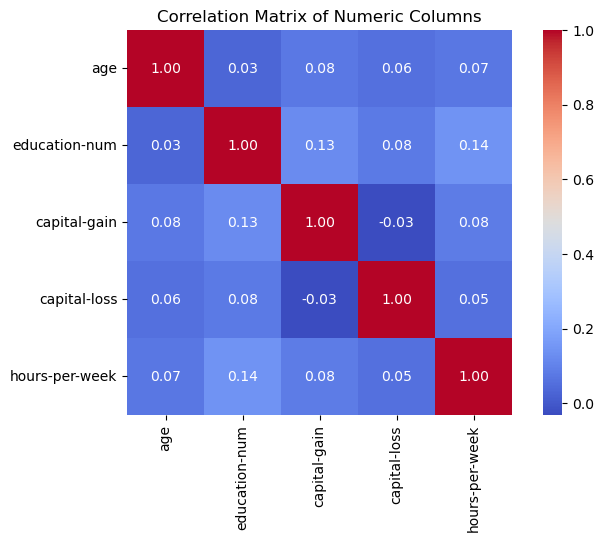

In [89]:
#trying to get the correlation between the numeric columns
# this will give us a matrix of correlation coefficients
numeric_columns_corr = df_num.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_columns_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [45]:
#plotting vapital gain as a function of hours worked per week
'''plt.figure(figsize=(8, 5))
sns.scatterplot(data=df,x='hours-per-week', y='capital-gain', hue='income', alpha=0.5)
plt.title('Capital Gain vs Hours Worked per Week')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Capital Gain')
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()'''

"plt.figure(figsize=(8, 5))\nsns.scatterplot(data=df,x='hours-per-week', y='capital-gain', hue='income', alpha=0.5)\nplt.title('Capital Gain vs Hours Worked per Week')\nplt.xlabel('Hours Worked per Week')\nplt.ylabel('Capital Gain')\nplt.legend(title='Income', loc='upper right')\nplt.grid(True)\nplt.show()"

In [47]:
df_num.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48568.000000,4.856800e+04,48568.000000,48568.000000,48568.000000,48568.000000
mean,38.642295,1.896385e+05,10.073608,1075.908726,87.741414,40.424704
std,13.714365,1.056425e+05,2.568636,7430.021192,403.581741,12.391966
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175085e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781570e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.375868e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### we can see the there are no 'anomalie' values like age > 120 or a negative capital-gain ... its a good sign that our data is clean

### we will remove the 'fnlwgt' column because it doesnt contribute any insightful data

In [ ]:
df_num.drop(columns=['fnlwgt'], inplace=True)
df_num.head(10)

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
5,37,14,0,0,40
6,49,5,0,0,16
7,52,9,0,0,45
8,31,14,14084,0,50
9,42,13,5178,0,40


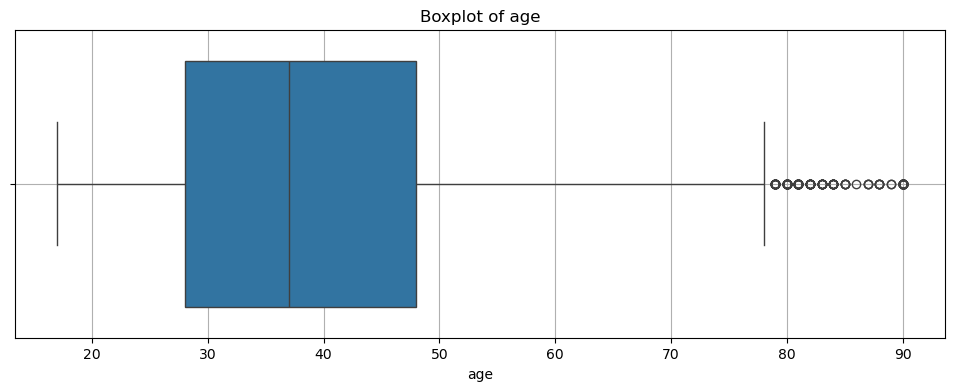

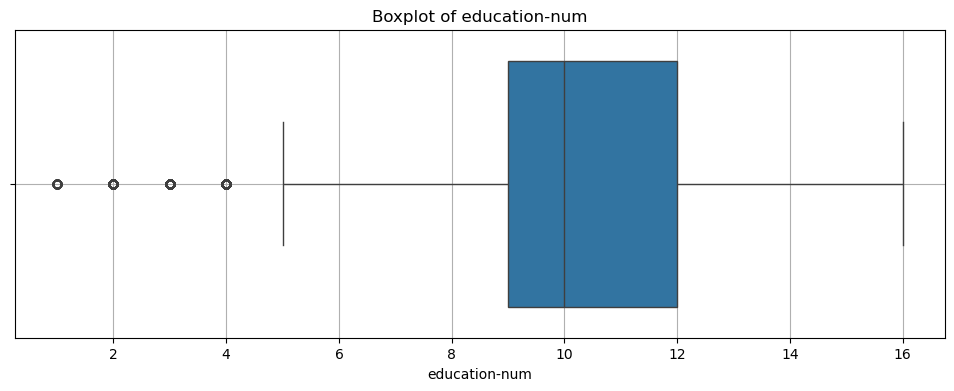

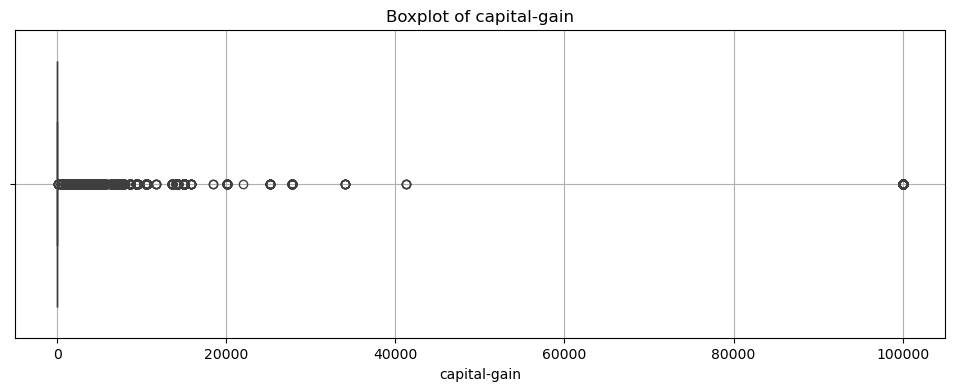

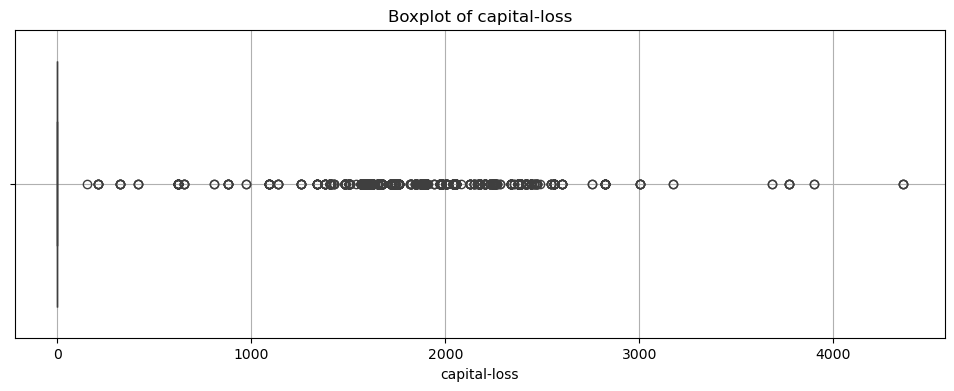

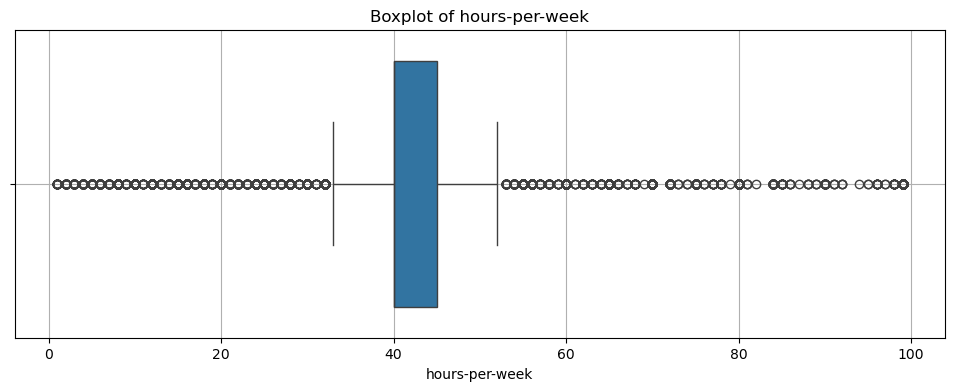

In [ ]:
#сreating boxplots for each numeric column to visualize the distribution and identify outliers
for column in df_num.columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(data=df_num, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

In [ ]:
#removing the outliers using the IQR method
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Create a mask for outliers
outlier_mask = (df_num < lower_bound) | (df_num > upper_bound)
print("IQR outliers:\n", outlier_mask.sum(), "rows")
#print the percentage of outliers
outlier_percentage = (outlier_mask.sum() / len(df_num)) * 100
print("Percentage of outliers in numeric columns:")
print(outlier_percentage.round(2), "%")

IQR outliers:
 age                 214
education-num      1783
capital-gain       4015
capital-loss       2275
hours-per-week    13425
dtype: int64 rows
Percentage of outliers in numeric columns:
age                0.44
education-num      3.67
capital-gain       8.27
capital-loss       4.68
hours-per-week    27.64
dtype: float64 %


#### we can see the there are a lot of outliers in the 'hours-per-week' column ~ 27%
removing those columns would change the data, maybe we can replace those values with the median value ?


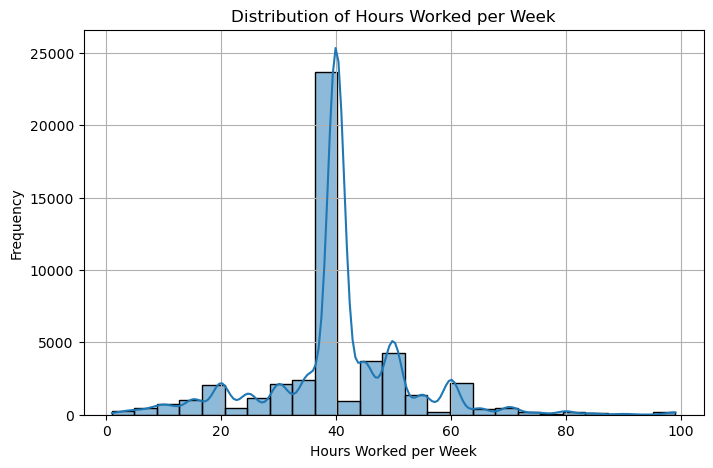

In [69]:
#lets plot the 'hour-per-week' column to get more sense of it
plt.figure(figsize=(8, 5))
sns.histplot(df_num['hours-per-week'], bins=25, kde=True)
plt.title('Distribution of Hours Worked per Week')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

we can see the close to a half of the values in 'hours-per-week' is very densely close to the median, maybe that can explain why there are so many outliers.

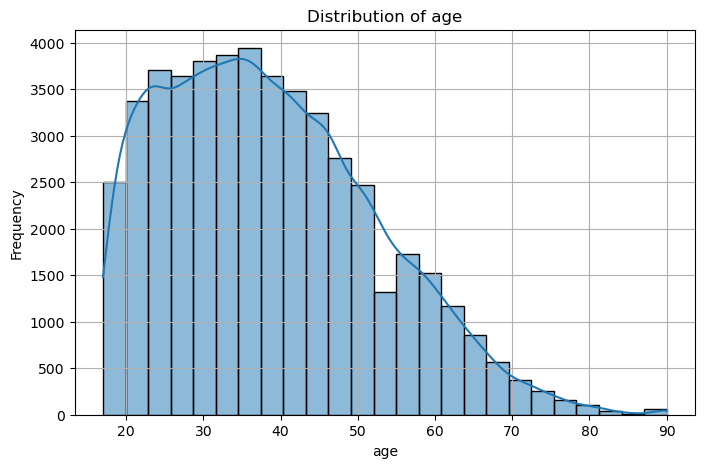

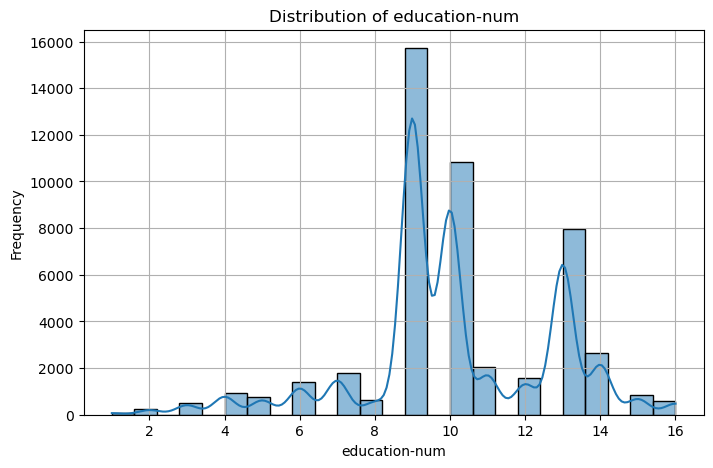

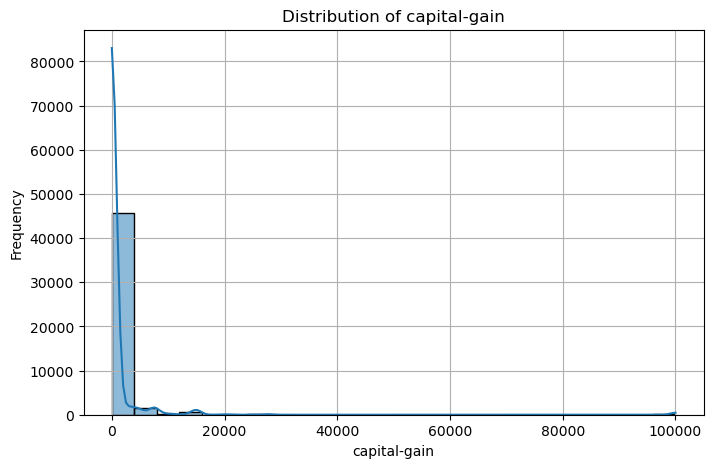

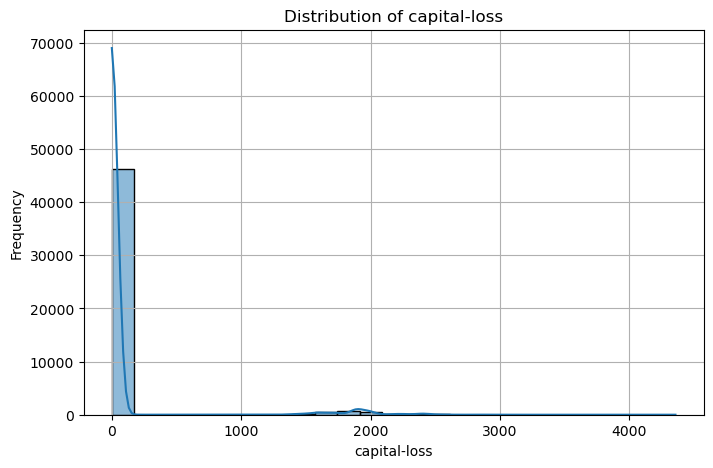

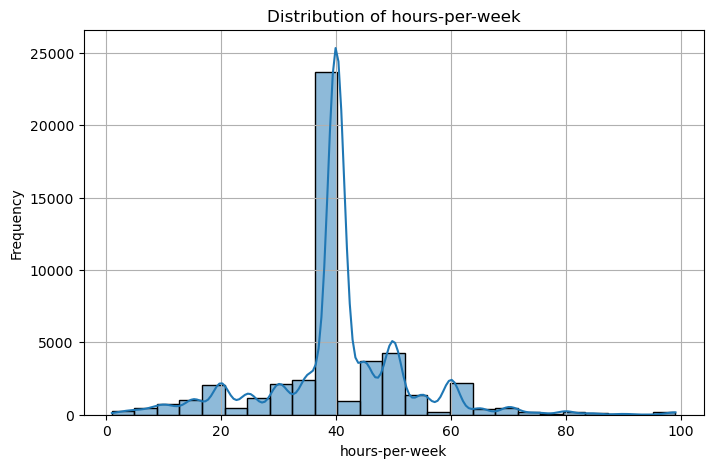

In [75]:
#lets plot the rest of the numeric columns
numeric_columns = df_num.columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_num[column], bins=25, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Now we want to handle the categorical data !

In [76]:
df_cat.describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,48568,48568,48568,48568,48568,48568,48568,48568,48568
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33717,15719,22255,6110,19617,41575,32461,43832,24720


### To work with categorical data we need to encode it as a number using one-hot encoding or label-encoding

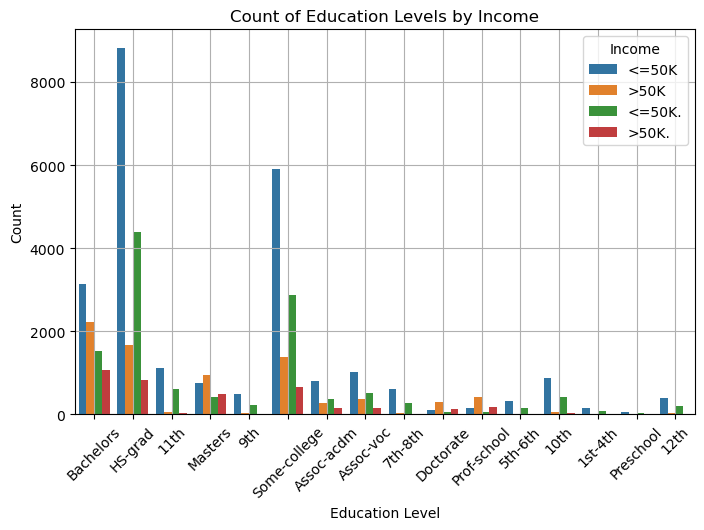

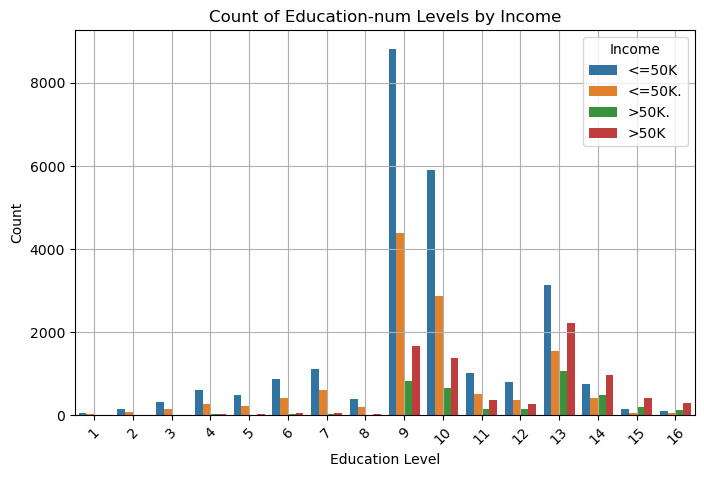

In [78]:
# we want to see if there are any correllations bwtween 'education-num' and 'education'
#lets plot the 'education' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='income')
plt.title('Count of Education Levels by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()
#lets plot the 'education-num' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education-num', hue='income')
plt.title('Count of Education-num Levels by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()

In [84]:
#lets union the '<=50k' and '<=50k.' to a one value
df_cat['income'] = df_cat['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
#lets check if the values are replaced
df_cat['income'].value_counts()
df['income'].value_counts()

income
<=50K    36955
>50K     11613
Name: count, dtype: int64

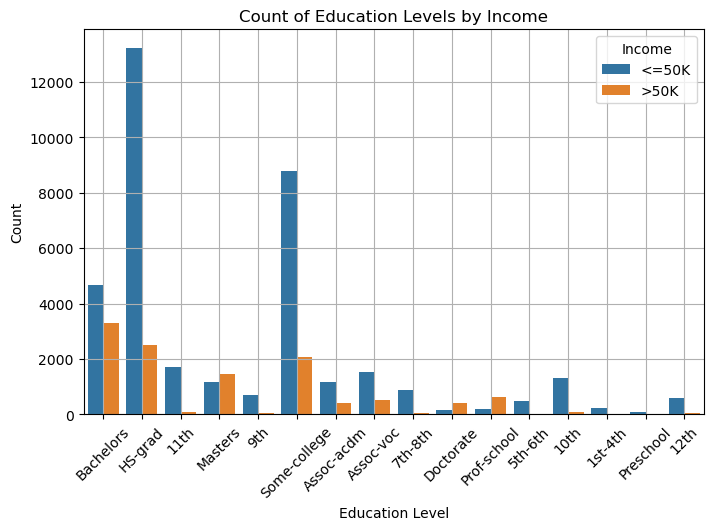

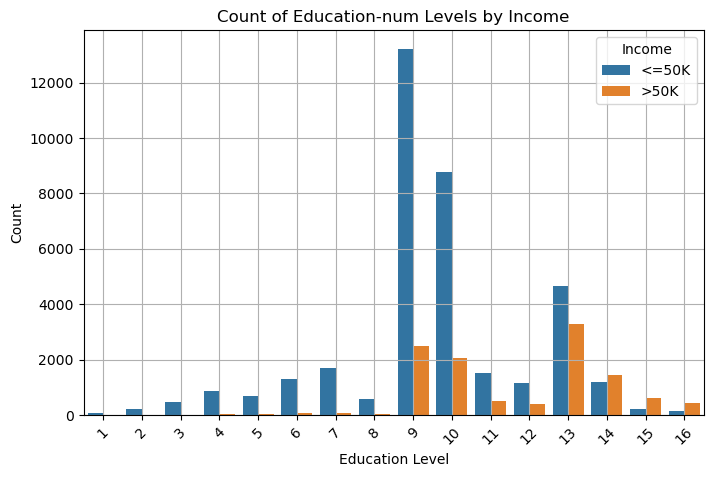

In [85]:
#lets plot the 'education' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='income')
plt.title('Count of Education Levels by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()
#lets plot the 'education-num' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education-num', hue='income')
plt.title('Count of Education-num Levels by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()

#### it seems as though the 2 plots are identical, however the values are placed differently. we need to figure out what values alighn bwtween the 2 plots.

In [103]:
# Show all rows
pd.set_option('display.max_rows', None)

# Prevent truncating long strings
pd.set_option('display.max_colwidth', None)

In [102]:
#i want to see all of the values in the 'education' column and 'eduation-num' column
print(df_cat['education'].value_counts())
print("-------------------------------------------------")
print(df_num['education-num'].value_counts())

education
HS-grad         15719
Some-college    10827
Bachelors        7960
Masters          2628
Assoc-voc        2054
11th             1808
Assoc-acdm       1591
10th             1384
7th-8th           950
Prof-school       825
9th               753
12th              651
Doctorate         585
5th-6th           505
1st-4th           245
Preschool          83
Name: count, dtype: int64
-------------------------------------------------
education-num
9     15719
10    10827
13     7960
14     2628
11     2054
7      1808
12     1591
6      1384
4       950
15      825
5       753
8       651
16      585
3       505
2       245
1        83
Name: count, dtype: int64


#### the values align which further strengthens our suspicion that this plots are identical.

# Plots !

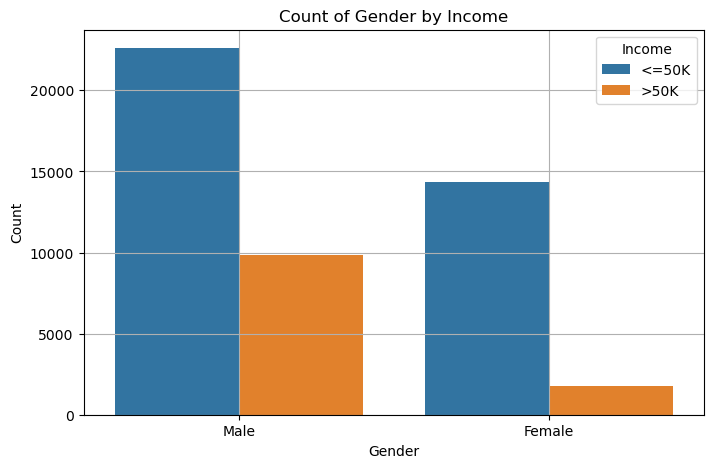

In [108]:
# we want to see the distribution on 'sex' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Count of Gender by Income')
plt.xlabel('Gender')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()

## what is capital-gain ?
#### A capital gain is the profit you realize when you sell a capital asset for more than your cost basis (what you originally paid for it). Conversely, if you sell for less than your cost basis, you incur a capital loss.
###	Capital Asset
Anything you own that can increase or decrease in value over time, such as:
	•	Stocks, bonds, ETFs
	•	Real estate (your home, rental properties)
	•	Business assets (equipment, intellectual property)
###		2.	Cost Basis
The original value of the asset for tax purposes. Typically:
Cost Basis = Purchase Price + Acquisition Costs (fees, commissions)
###	3.	Sales Proceeds
The amount you receive when you sell the asset, net of selling costs (commissions, closing costs).
###	4.	Capital Gain
Capital Gain = Sales Proceeds - Cost Basis

